In [40]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import skimage.io
import cv2
import imblearn

In [29]:
!pip install imbalanced-learn

     |████████████████████████████████| 206 kB 2.8 MB/s eta 0:00:01


In [31]:
curr_dir = os.getcwd()
path = os.path.dirname(curr_dir)
print(path)
csv_file_path = os.path.join(path, 'dataset/DataCSV/multicam_full_h36m.csv')

/home/rasho/Falling-Person-Detection-based-On-AlphaPose


In [32]:
df = pd.read_csv(csv_file_path)
df = df.drop(['Unnamed: 0','idx'], axis=1)
#df = df.sort_values(['score'],ascending=False)

In [ ]:
#df = df.drop_duplicates(subset = ['image_id','pos_class'], keep = 'first')
#df = df.sort_index()

In [33]:
df['pos_class'].value_counts()

Standing    37657
Falling     17286
Name: pos_class, dtype: int64

In [36]:
df.columns

Index(['image_id', 'pos_class', 'box', 'score', 'Hip_x', 'Hip_y', 'RHip_x',
       'RHip_y', 'RKnee_x', 'RKnee_y', 'RFoot_x', 'RFoot_y', 'LHip_x',
       'LHip_y', 'LKnee_x', 'LKnee_y', 'LFoot_x', 'LFoot_y', 'Spine_x',
       'Spine_y', 'Thorax_x', 'Thorax_y', 'Nose_x', 'Nose_y', 'Head_x',
       'Head_y', 'LShoulder_x', 'LShoulder_y', 'LElbow_x', 'LElbow_y',
       'LWrist_x', 'LWrist_y', 'RShoulder_x', 'RShoulder_y', 'RElbow_x',
       'RElbow_y', 'RWrist_x', 'RWrist_y'],
      dtype='object')

In [37]:
df.head()

,image_id,pos_class,box,score,Hip_x,Hip_y,RHip_x,RHip_y,RKnee_x,RKnee_y,...,LElbow_x,LElbow_y,LWrist_x,LWrist_y,RShoulder_x,RShoulder_y,RElbow_x,RElbow_y,RWrist_x,RWrist_y
0,01095.jpg,Falling,"[264.7388000488281, 97.85186004638672, 174.059...",2.473748,372.166229,201.207169,380.098633,201.207169,409.561859,242.002396,...,293.975372,130.948700,255.446533,140.014313,364.233826,133.215103,389.164246,128.682297,411.828278,103.751877
1,01096.jpg,Falling,"[270.8756103515625, 90.72824096679688, 167.931...",2.418112,365.774277,202.608543,373.427399,201.515244,404.039856,240.874130,...,279.403351,135.917068,254.257401,139.196991,353.747955,138.103683,377.800598,127.170654,395.293457,103.117996
2,01097.jpg,Falling,"[205.35069274902344, 93.36463165283203, 236.03...",2.625777,361.788422,201.726387,361.788422,203.263107,398.669617,243.217728,...,364.861847,123.353851,383.302460,101.839813,315.686920,135.647583,275.732300,141.794449,238.851105,147.941315
3,01098.jpg,Falling,"[207.93246459960938, 113.12434387207031, 227.2...",2.519368,354.134201,201.688332,355.613983,203.168106,394.088104,241.642258,...,352.654419,123.260284,367.452179,105.502991,326.018494,146.936676,346.735321,126.219833,367.452179,105.502991
4,01099.jpg,Falling,"[206.1958465576172, 104.33092498779297, 230.08...",2.612864,349.700714,212.788422,355.692566,211.290466,385.651825,241.249725,...,241.847382,148.376007,217.879974,157.363800,325.733307,145.380096,343.708862,118.416756,355.692566,100.441200


In [38]:
# Class count
count_class_0, count_class_1 = df.pos_class.value_counts()
# Divide by class
df_class_1 = df[df['pos_class']=='Falling']
df_class_0 = df[df['pos_class']=='Standing']

Random under-sampling:
Standing    17286
Falling     17286
Name: pos_class, dtype: int64


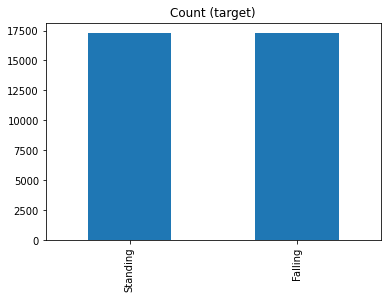

In [39]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.pos_class.value_counts())

df_test_under.pos_class.value_counts().plot(kind='bar', title='Count (target)');

Random over-sampling:
Standing    37657
Falling     37657
Name: pos_class, dtype: int64


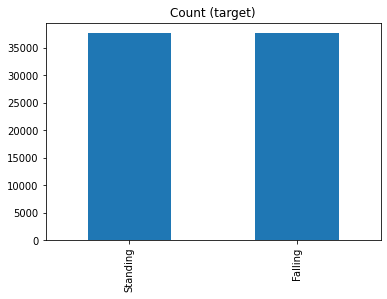

In [41]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.pos_class.value_counts())

df_test_over.pos_class.value_counts().plot(kind='bar', title='Count (target)');

In [56]:
y = np.array(df['pos_class'].astype('category').cat.codes)

In [67]:
y = np.array(df['pos_class'])

In [68]:
y

array(['Falling', 'Falling', 'Falling', ..., 'Standing', 'Standing',
       'Standing'], dtype=object)

In [69]:
X = np.array(df.iloc[:,4:])

In [70]:
X

array([[372.16622925, 201.20716858, 380.09863281, ..., 128.68229675,
        411.82827759, 103.75187683],
       [365.77427673, 202.6085434 , 373.42739868, ..., 127.1706543 ,
        395.29345703, 103.11799622],
       [361.78842163, 201.72638702, 361.78842163, ..., 141.79444885,
        238.85110474, 147.9413147 ],
       ...,
       [321.99333191,  97.27463531, 315.50271606, ...,  94.3899231 ,
        350.11932373, 110.25587463],
       [689.22851562, 150.07591248, 697.78985596, ..., 139.44802856,
        702.5133667 , 149.48547363],
       [325.82437134,  95.53025055, 318.26855469, ...,  94.01908875,
        348.49182129, 115.17538452]])

In [71]:
X.shape

(54943, 34)

In [72]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    plt.figure(figsize=(14,10))
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

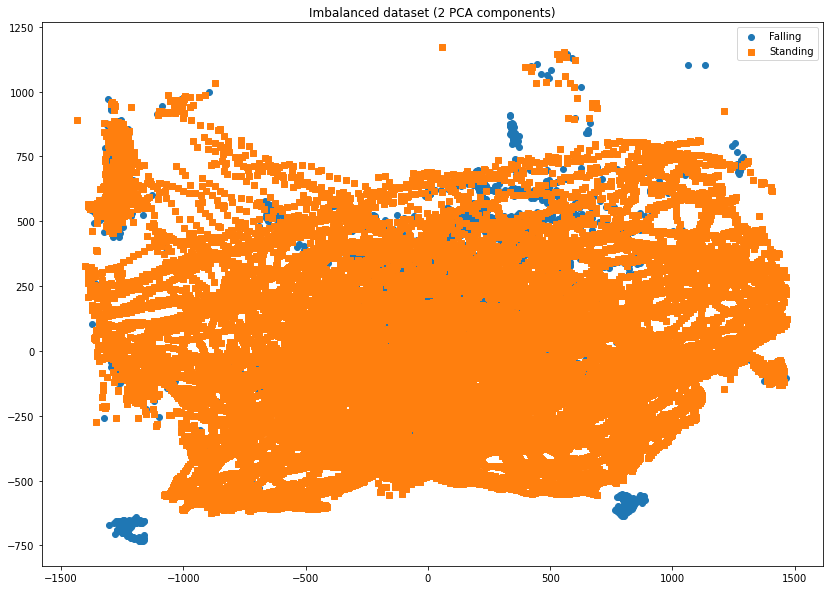

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

Counter({'Standing': 37657, 'Falling': 17286})
Counter({'Falling': 17286, 'Standing': 17286})


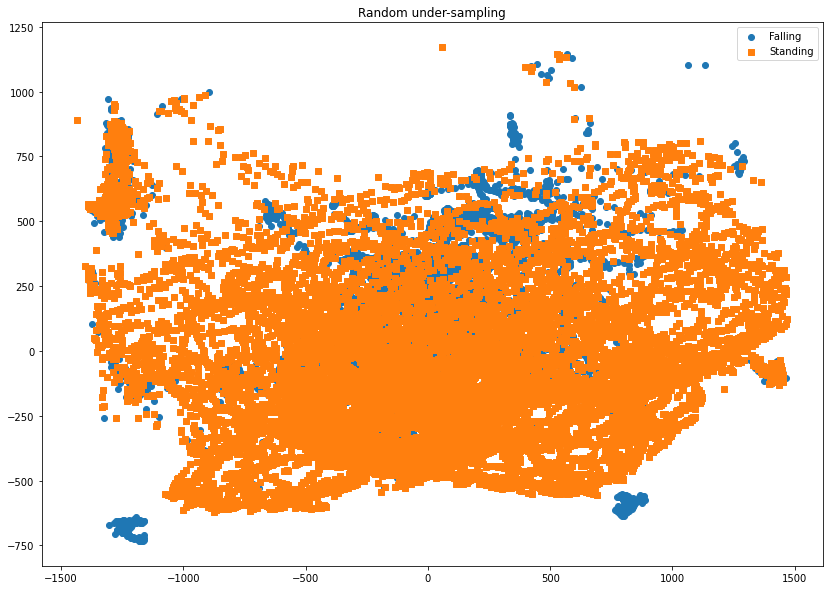

In [87]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print(Counter(y))
undersample = RandomUnderSampler(sampling_strategy='majority')
X_rus, y_rus= rus.fit_resample(X, y)
print(Counter(y_rus))
plot_2d_space(X_rus, y_rus, 'Random under-sampling')

Resampled dataset shape Counter({'Standing': 35187, 'Falling': 17286})


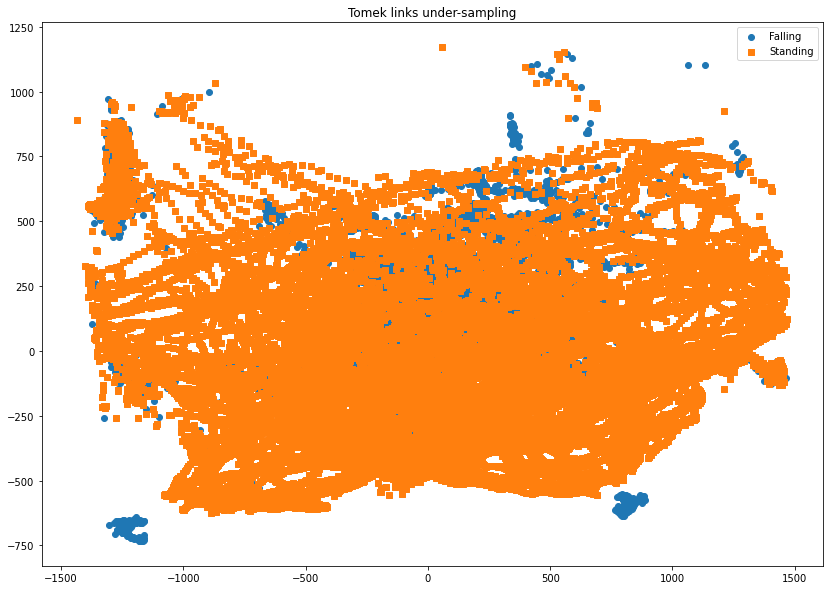

In [97]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_res, y_res = tl.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))
plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

In [94]:
from imblearn.under_sampling import ClusterCentroids 
cc = ClusterCentroids(random_state=42)
X_res, y_res= cc.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'Falling': 17286, 'Standing': 17286})


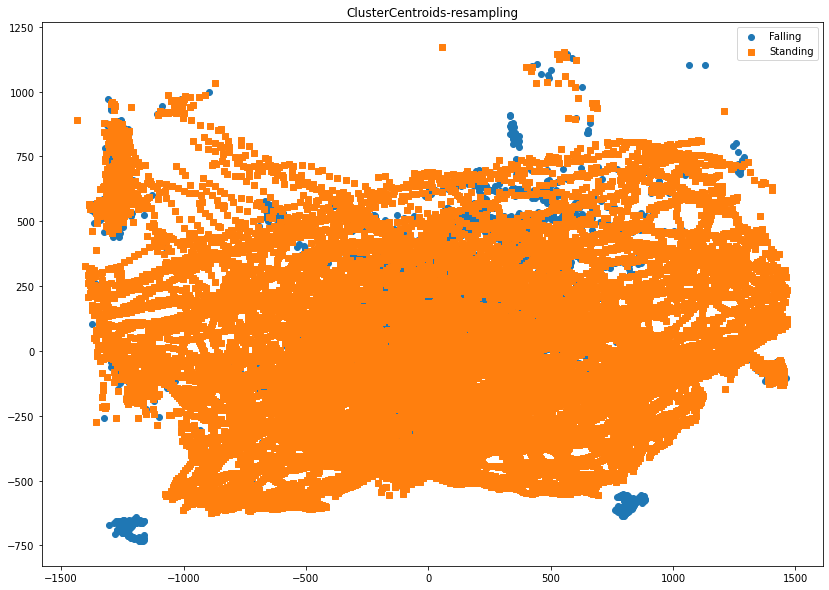

In [96]:
plot_2d_space(X_res, y_res, 'ClusterCentroids-resampling')

In [25]:
csv_file_path = os.path.join(path, 'dataset/DataCSV/multicam_fblc_h36m.csv')
df_test_under.to_csv(csv_file_path)

In [28]:
csv_file_path = os.path.join(path, 'dataset/DataCSV/multicam_fovblc_h36m.csv')
df_test_over.to_csv(csv_file_path)

In [ ]:
#df = df.drop(['nose_x','nose_y','LEye_x',
#       'LEye_y', 'REye_x', 'REye_y', 'LEar_x', 'LEar_y', 'REar_x', 'REar_y'], axis=1)

In [ ]:
# Load a random image from the images folder
#file_names = next(os.walk(IMAGE_DIR))[2]

#image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
image = skimage.io.imread('/home/rasho/Falling-Person-Detection-based-On-AlphaPose/input/Falling_Standing/FallingDown_01/00400.png')
image.shape

In [ ]:
box = df['box'][400]
box

In [ ]:
x = float(box.strip('[,]').split(',')[0])
y = float(box.strip('[,]').split(',')[1])
w = float(box.strip('[,]').split(',')[2])
h = float(box.strip('[,]').split(',')[3])

In [ ]:
plt.imshow(image)

In [ ]:
bbox = [x,x+w,y,y+h] #xmin,xmax,ymin,ymax
cv2.rectangle(image, (int(bbox[0]), int(bbox[2])), (int(bbox[1]),int(bbox[3])), (0,255), 3)
plt.imshow(image)

In [ ]:
import math
def get_angle(x,y):
    #return angle in degrees
    return (math.atan2(y,x)*(180/math.pi))

In [ ]:
df['foot_x'] = df['RFoot_x']-df['LFoot_x']
df['foot_y'] = df['RFoot_y']-df['LFoot_y']
df['angle_x']= df['Head_x']-df['foot_x']
df['angle_y']= df['Head_y']-df['foot_y']

In [ ]:
df[['angle_x','angle_y']]

In [ ]:
df['angle']= df.apply(lambda row: get_angle(x = row['angle_x'], y = row['angle_y']), axis=1)

In [ ]:
df.head()

In [ ]:
df3 = df[['pos_class','angle']]
falling_angle  = df3.loc[(df3['pos_class']=='Falling')]
standing_angle = df3.loc[(df3['pos_class']=='Standing')]
falling_angle  = falling_angle.iloc[:160].to_numpy()
standing_angle = standing_angle.iloc[:160].to_numpy()

In [ ]:
falling_angle

In [ ]:
falling_angle[:,1].min()

In [ ]:
falling_angle[:,1].max()

In [ ]:
falling_angle[:,1].mean()

In [ ]:
standing_angle

In [ ]:
standing_angle[:,1].min()

In [ ]:
standing_angle[:,1].max()

In [ ]:
standing_angle[:,1].mean()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
frames = np.arange(0,len(falling_angle))
plt.plot(frames,falling_angle[:,1],label='FallingDown')
plt.plot(frames,standing_angle[:,1],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Angle in degrees')
plt.title('The angle between the center line of the Human and the Ground')
plt.legend()
plt.show()

In [ ]:
df4 = df[['pos_class','score']]
falling_dist = df4.loc[(df4['pos_class']=='Falling')]
standing_dist = df4.loc[(df4['pos_class']=='Standing')]
falling_dist  = falling_dist.iloc[:160].to_numpy()
standing_dist = standing_dist.iloc[:160].to_numpy()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
frames = np.arange(0,len(falling_dist))
plt.plot(frames,falling_dist[:,1],label='FallingDown')
plt.plot(frames,standing_dist[:,1],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Score')
plt.title('Person Detection Confidence score')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
num_bins = 50
plt.hist(df4['score'],num_bins,density=True)
#plt.hist(stand[:,0],num_bins,density=True)
plt.show()

In [ ]:
df['score'].mean()

In [ ]:
df['score'].max()

In [ ]:
df['score'].min()

In [ ]:
plt.hist??

In [ ]:
df['Knee_x'] = df['RKnee_x']- df['LKnee_x']
df['Knee_y'] = df['RKnee_y']- df['LKnee_y']
df['SK_x']= df['Spine_x']-df['Knee_x']
df['SK_y']= df['Spine_y']-df['Knee_y']
df['dist'] = np.sqrt(np.square(df['SK_x'])+np.square(df['SK_y']))

In [ ]:
df4 = df[['pos_class','dist']]
falling_dist = df4.loc[(df4['pos_class']=='Falling')]
standing_dist = df4.loc[(df4['pos_class']=='Standing')]
falling_dist  = falling_dist.iloc[:160].to_numpy()
standing_dist = standing_dist.iloc[:160].to_numpy()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
frames = np.arange(0,len(falling_dist))
plt.plot(frames,falling_dist[:,1],label='FallingDown')
plt.plot(frames,standing_dist[:,1],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Distance')
plt.title('Distance between Spine and Knee center')
plt.legend()
plt.show()

In [ ]:
df4['dist'].mean()

In [ ]:
df4['dist'].min()

In [ ]:
df4['dist'].max()

In [ ]:
#df4.loc[(df4['pos_class']=='NotFalls')&(df4['dist']<300)]
df4.loc[(df4['pos_class']=='Standing')&(df4['dist']<300)]

In [ ]:
def get_ratio(box):
    
    x = float(box.strip('[,]').split(',')[0])
    y = float(box.strip('[,]').split(',')[1])
    w = float(box.strip('[,]').split(',')[2])
    h = float(box.strip('[,]').split(',')[3])
    return w/h

In [ ]:
df['box_ratio']=df['box'].map(get_ratio)

In [ ]:
df['box_ratio'][5273]

In [ ]:
df5 = df[['pos_class','box_ratio']]
falling_ratio  = df5.loc[(df5['pos_class']=='Falling')]
standing_ratio = df5.loc[(df5['pos_class']=='Standing')]
falling_ratio  = falling_ratio.iloc[:3300].to_numpy()
standing_ratio = standing_ratio.iloc[:3300].to_numpy()

In [ ]:
falling_ratio[:,1].mean()

In [ ]:
falling_ratio[:,1].max()

In [ ]:
falling_ratio[:,1].min()

In [ ]:
standing_ratio[:,1].mean()

In [ ]:
standing_ratio[:,1].max()

In [ ]:
standing_ratio[:,1].min()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
frames = np.arange(0,len(falling_ratio ))
plt.plot(frames[:160],falling_ratio[:160,1],label='FallingDown')
plt.plot(frames[:160],standing_ratio[:160,1],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Box W/H Ratio')
plt.title('Box W/H Ratio for Falling and Standing person')
plt.legend()
plt.show()

In [ ]:
df2 = df[['image_id','pos_class','box_ratio']]

In [ ]:
df2.loc[(df2['pos_class']=='FallingDown')&(df2['box_ratio']>2)]

In [ ]:
df2.loc[(df2['pos_class']=='FallingDown')&(df2['box_ratio']<2)]

In [ ]:
df2.loc[(df2['pos_class']=='Standing')&(df2['box_ratio']>2)]

In [ ]:
df2.loc[(df2['pos_class']=='FallingDown')& (df2['box_ratio']>0.95) | (df2['pos_class']=='Standing')& (df2['box_ratio']<0.95)]

In [ ]:
df2['pos_class'].unique

In [ ]:
x1_diff,y1_diff = feat_df['LShoulder_x']-feat_df['nose_x'],feat_df['LShoulder_y']-feat_df['nose_y']
x1y1_len = np.sqrt(np.square(x1_diff)+np.square(y1_diff))
x1,y1 = x1_diff/x1y1_len,y1_diff/x1y1_len
df['x1'] = x1
df['y1'] = y1

In [ ]:
x2_diff, y2_diff = feat_df['RShoulder_x']-feat_df['nose_x'],feat_df['RShoulder_y']-feat_df['nose_y']
x2y2_len = np.sqrt(np.square(x2_diff)+np.square(y2_diff))
x2, y2 = x2_diff/x2y2_len, y2_diff/x2y2_len
df['x2'] = x2
df['y2'] = y2

In [ ]:
df.columns

In [ ]:
df

In [ ]:
df[df.iloc[:,30:].isna().any(axis=1)]

In [ ]:
df = df.dropna()

In [ ]:
df.isna().any()

In [ ]:
df.to_csv('data/victorized_res.csv')

In [ ]:
curr_dir = os.getcwd()
csv_file_path = os.path.join(curr_dir, 'data/res_with_flips.csv')

In [ ]:
df2 = pd.read_csv(csv_file_path)
df2 = df2.drop(['Unnamed: 0','idx'], axis=1)
df2 = df2.sort_values(['score'],ascending=False)

In [ ]:
df2 = df2.drop_duplicates(subset = ['image_id','pos_class'], keep = 'first')
df2 = df2.sort_index()
df2.head()

In [ ]:
df2

In [ ]:
df2.to_csv('data/clean_res_with_flips.csv')

In [ ]:
df.columns

In [ ]:
def get_center(coord1, coord2):
    return (coord1+coord2)/2

In [ ]:
# get center of Right Hip joint and Left Hip joint
df['HipCent_x'] = df.apply(lambda row: get_center(coord1=row['RHip_x'],coord2=row['LHip_x']), axis=1)
df['HipCent_y'] = df.apply(lambda row: get_center(coord1=row['RHip_y'],coord2=row['LHip_y']), axis=1)

In [ ]:
df.head()

In [ ]:
def get_vector(p1_x,p1_y,p2_x,p2_y):
    
    return p2_x-p1_x, p2_y-p1_y

In [ ]:
#get waist, Spine2, Right thigh, Left Thigh, Right Calf, Left Calf vectors.
df['waist_x'], df['waist_y'] = zip(*df.apply(lambda row: get_vector(p1_x=row['RHip_x'],p1_y=row['RHip_y'],p2_x=row['LHip_x'],p2_y=row['LHip_y']), axis=1))
df['Spine2_x'], df['Spine2_y'] = zip(*df.apply(lambda row: get_vector(p1_x=row['Thorax_x'],p1_y=row['Thorax_y'],p2_x=row['HipCent_x'],p2_y=row['HipCent_y']), axis=1))
df['Rthigh_x'], df['Rthigh_y'] = zip(*df.apply(lambda row: get_vector(p1_x=row['RHip_x'],p1_y=row['RHip_y'],p2_x=row['RKnee_x'],p2_y=row['RKnee_y']), axis=1))
df['Lthigh_x'], df['Lthigh_y'] = zip(*df.apply(lambda row: get_vector(p1_x=row['LHip_x'],p1_y=row['LHip_y'],p2_x=row['LKnee_x'],p2_y=row['LKnee_y']), axis=1))
df['Rcalf_x'], df['Rcalf_y'] = zip(*df.apply(lambda row: get_vector(p1_x=row['RKnee_x'],p1_y=row['RKnee_y'],p2_x=row['RFoot_x'],p2_y=row['RFoot_y']), axis=1))
df['Lcalf_x'], df['Lcalf_y'] = zip(*df.apply(lambda row: get_vector(p1_x=row['LKnee_x'],p1_y=row['LKnee_y'],p2_x=row['LFoot_x'],p2_y=row['LFoot_y']), axis=1))


In [ ]:
def get_vectorRatio(p1_x,p1_y,p2_x,p2_y):
    # add small number to numerator and denominator
    p1_len = np.sqrt(np.square(p1_x)+np.square(p1_y))
    p2_len = np.sqrt(np.square(p2_x)+np.square(p2_y))
    return (p1_len+0.00001)/(p2_len+0.00001)

In [ ]:
df['SRatio'] = df.apply(lambda row: get_vectorRatio(p1_x=row['Spine2_x'],p1_y=row['Spine2_y'],p2_x=row['waist_x'],p2_y=row['waist_y']), axis=1)

In [ ]:
df2 = df[['SRatio','pos_class']]

In [ ]:
fall = df2.loc[(df2['pos_class']=='Falling')]
fall = fall.iloc[:4000].iloc[:,:1].to_numpy()

In [ ]:
fall

In [ ]:
stand = df2.loc[(df2['pos_class']=='Standing')]
stand = stand[:4000].iloc[:,:1].to_numpy()

In [ ]:
stand

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
frames = np.arange(0,len(fall))
plt.plot(frames[:160],fall[:160,0],label='FallingDown')
plt.plot(frames[:160], stand[:160,0],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Spine Ratio')
plt.title('Spine Ratio for Standing and Falling')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
num_bins = 5
plt.hist(fall[:,0],num_bins,density=True)
plt.hist(stand[:,0],num_bins,density=True)
plt.show()

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df['hip_v'] = df['HipCent_y'].diff(periods=5).abs()/4

In [ ]:
df['spine_v'] = df['Spine_y'].diff(periods=5).abs()/4

In [ ]:
df['head_v'] = df['Head_y'].diff(periods=5).abs()/4

In [ ]:
df.isna().any()

In [ ]:
df[df.iloc[:,30:].isna().any(axis=1)]

In [ ]:
df = df.dropna()

In [ ]:
df.isna().any()

In [ ]:
df5 = df[['pos_class','hip_v','spine_v','head_v']]
fall = df5.loc[(df5['pos_class']=='Falling')]
stand = df5.loc[(df5['pos_class']=='Standing')]
fall  = fall.iloc[:3300].to_numpy()
stand  = stand.iloc[:3300].to_numpy()

In [ ]:
fall[:,1].min()

In [ ]:
fall[:,1].mean()

In [ ]:
fall[:,1].max()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
frames = np.arange(0,len(fall))
plt.plot(frames[:160],fall[:160,1],label='FallingDown')
plt.plot(frames[:160], stand[:160,1],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Hip Speed')
plt.title('Hip Speed for Standing and Falling')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
frames = np.arange(0,len(fall))
plt.plot(frames[:160],fall[:160,2],label='FallingDown')
plt.plot(frames[:160], stand[:160,2],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Spine Speed')
plt.title('Spine Speed for Standing and Falling')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(14,7))
frames = np.arange(0,len(fall))
plt.plot(frames[:160],fall[:160,3],label='FallingDown')
plt.plot(frames[:160], stand[:160,3],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Head Speed')
plt.title('Head Speed for Standing and Falling')
plt.legend()
plt.show()

In [ ]:
n_frames = 5
pose2d_size =34
humanData = np.zeros([n_frames, pose2d_size])

In [ ]:
humanData

In [ ]:
pose = np.ones(34)

In [ ]:
humanData[0,:]= pose

In [ ]:
humanData

In [ ]:
humanData[1:5,:]